# March 28, 2023 Data Analysis Notebook

In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "March"
day = "28"

## Imports and initialization

In [2]:
from matplotlib import gridspec

In [3]:
import scipy.signal

In [4]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [5]:
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

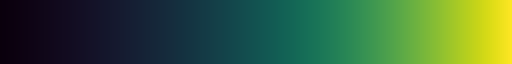

In [6]:
dark_viridis_cmap

In [7]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

In [8]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

## Standard Calibrations

### Temperature

#### Running Temperature

In [ ]:
reload(ca)
cTemps, cTimes = ca.loadAllTemperatureData()
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
fig, ax = plt.subplots(figsize=(20,10))
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes,temp, label=lab, alpha=0.5, linewidth=1)
ax.legend()
ax.set_title('Lab Temperature Record');
ax.set_ylim(20,30)

In [ ]:
fig, ax = plt.subplots()
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes[-50000:],temp[-50000:], label=lab, alpha=0.5, linewidth=1)


#### Today's Temperature

## individual calibrations

### MOT_NUMBER

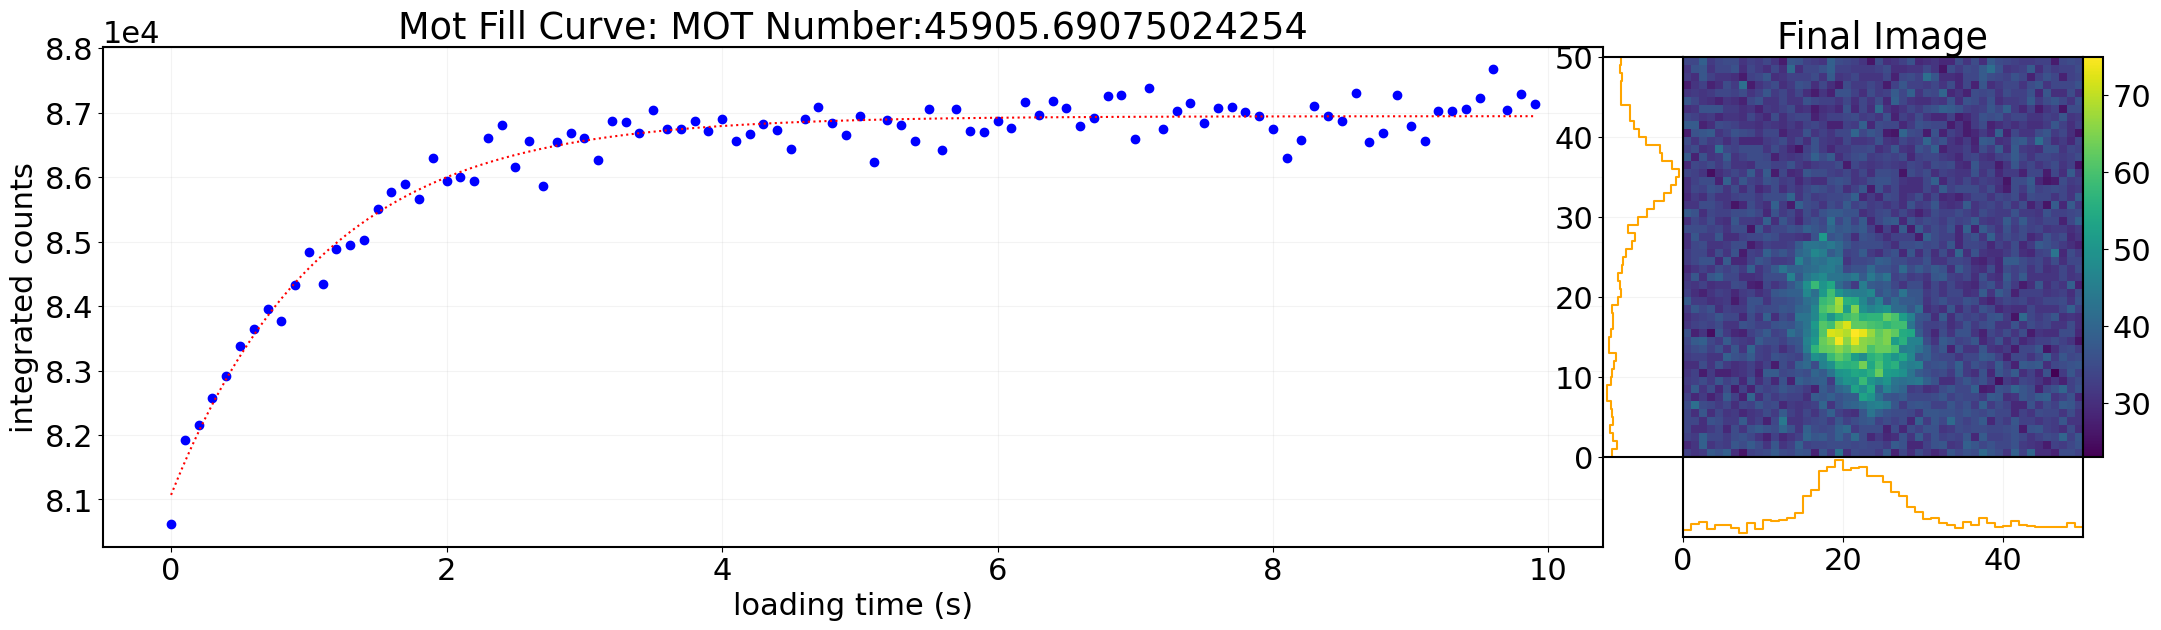

### MOT_TEMPERATURE

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/MOT_TEMPERATURE.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/MOT_TEMPERATURE.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### RED_PGC_TEMPERATURE

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/RED_PGC_TEMPERATURE.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/RED_PGC_TEMPERATURE.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### GREY_MOLASSES_TEMPERATURE

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/GREY_MOLASSES_TEMPERATURE.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/GREY_MOLASSES_TEMPERATURE.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### BASIC_SINGLE_ATOMS

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/BASIC_SINGLE_ATOMS.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/BASIC_SINGLE_ATOMS.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### 3DSBC_TOP_CARRIER_RAMAN_SPECTROSCOPY

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_TOP_CARRIER_RAMAN_SPECTROSCOPY.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_TOP_CARRIER_RAMAN_SPECTROSCOPY.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### THERMAL_TOP_SIDEBAND_RAMAN_SPECTROSCOPY

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/THERMAL_TOP_SIDEBAND_RAMAN_SPECTROSCOPY.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/THERMAL_TOP_SIDEBAND_RAMAN_SPECTROSCOPY.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### 3DSBC_AXIAL_RAMAN_SPECTROSCOPY

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_AXIAL_RAMAN_SPECTROSCOPY.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_AXIAL_RAMAN_SPECTROSCOPY.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### 3DSBC_TOP_SIDEBAND_RAMAN_SPECTROSCOPY

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_TOP_SIDEBAND_RAMAN_SPECTROSCOPY.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/3DSBC_TOP_SIDEBAND_RAMAN_SPECTROSCOPY.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### DEPTH_MEASUREMENT_DEEP

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/DEPTH_MEASUREMENT_DEEP.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/DEPTH_MEASUREMENT_DEEP.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### DEPTH_MEASUREMENT_SHALLOW

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/DEPTH_MEASUREMENT_SHALLOW.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/DEPTH_MEASUREMENT_SHALLOW.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### LIFETIME_MEASUREMENT

Failed to open file! file address was "/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/LIFETIME_MEASUREMENT.h5". OSError: [Errno 2] Unable to open file (unable to open file: name = '/Volumes/Local_Data_Repository/2023/March/March 28/Raw Data/LIFETIME_MEASUREMENT.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
MOT temp = None
PGC temp = None
LGM temp = None
Thermal Nbar = None
Radial Nbar = None
Axial Nbar = None
Lifetime = None



In [39]:
sCalData = ca.std_analyzeAll_values()

In [ ]:
with open(exp.dataAddress + 'CalibrationData.p','wb') as calFile:
    pickle.dump(sCalData, calFile)

## Calibration Summmary

In [ ]:
# load all past calibration data into a bigger strucutre.
reloadMyModules()
calData = ca.loadAllCalData()
reloadMyModules(day_=day)

In [ ]:
reload(ca)
ca.checkData(calData)

# Today's Work

In [9]:
reloadMyModules(28)

In [12]:
binningParams=(3,3)
picsPerRep = 2
fileNumber=6
analysisOpts=tao.getStandardLoadingOptions([2,2,3,3,1])
tOptions=[to.ThresholdOptions(histBinSize=5)]
( binnedData, groupedData, keyName, repetitions, key, numOfPictures, avgPics, basicInfoStr, analysisOpts, 
 groupedRawData, isAnnotated ) = ta.organizeTransferData( fileNumber, analysisOpts, picsPerRep=picsPerRep, varyingDim=None )

Number of Pictures: 500; Picture Dimensions: 5 x 24
Variations: 10;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 7:44:10: on (Y-M-D) 2023-3-28, And ended at 7:46:52: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



In [32]:
print(np.shape(binnedData))

(500, 5, 24)


In [75]:
def stage1TransferAnalysis(fileNumber, analysisOpts, picsPerRep=2, varyingDim=None, tOptions=[to.ThresholdOptions()], **organizerArgs ):
    """
    This stage is re-used in the fsi analysis. It's all the analysis up to the post-selection.
    """
    #assert(type(analysisOpts) == ao.TransferAnalysisOptions)
    print("sta: Organizing Transfer Data...")
    ( binnedData, groupedData, keyName, repetitions, key, numOfPictures, avgPics, basicInfoStr, analysisOpts, 
     groupedRawData, isAnnotated ) = ta.organizeTransferData( fileNumber, analysisOpts, picsPerRep=picsPerRep, varyingDim=varyingDim, **organizerArgs )
    print("sta: Getting Transfer Thresholds...")
    res = ta.getTransferThresholds( analysisOpts, binnedData, groupedData, picsPerRep, tOptions )
    borders_init, borders_tfer, initThresholds, tferThresholds = res
    print("sta: Determining Atom Prescence...")
    res = ta.determineTransferAtomPrescence( analysisOpts, groupedData, picsPerRep, borders_init, borders_tfer, initThresholds, tferThresholds) ## [true, false, false, etc..],[false,true,true,etcc],...
    initAtoms, tferAtoms, initPicCounts, tferPicCounts = res # initAtoms (# of variations,# of tweezers, # or reps)
    print("sta: Getting Transfer Atom Images...")
    initAtomImages, tferAtomImages = ta.getTransferAtomImages( analysisOpts, groupedData, numOfPictures, picsPerRep, initAtoms, tferAtoms )    
    # print('innn',np.shape(initAtomImages))
    # imshow(initAtomImages[5][2])
    print(np.shape(initAtomImages))
    initAtomsPs, tferAtomsPs, ensembleHits, groupedPostSelectedPics, condHitList = [[None for _ in initAtoms] for _ in range(5)]
    print("sta: Post-Selecting...",end='')
    for varInc in range(len(initAtoms)):
        print('.',end='')
        extraDataToPostSelectIn = list(zip(*[groupedRawData[varInc][picNum::picsPerRep] for picNum in range(picsPerRep)]))
        ensembleHits[varInc] = None # Used to be assigned in postSelectOnAssembly
        initAtomsPs[varInc], tferAtomsPs[varInc], tempPS, condHitList[varInc] = ah.postSelectOnAssembly(initAtoms[varInc], tferAtoms[varInc], analysisOpts, 
                                                                                   extraDataToPostSelect = extraDataToPostSelectIn )
        
        groupedPostSelectedPics[varInc] = [[] for _ in tempPS]
        for conditionnum, conditionPics in enumerate(tempPS):
            for repPics in conditionPics:
                for picNum in range(picsPerRep):
                    groupedPostSelectedPics[varInc][conditionnum].append(repPics[picNum])
        initAtoms[varInc], tferAtoms[varInc], _, _ = ah.postSelectOnAssembly(initAtoms[varInc], tferAtoms[varInc], analysisOpts, justReformat=True)
    print(initAtomsPs[1][0])
    # print(np.shape(initAtomsPs))
    return (initAtoms, tferAtoms, initAtomsPs, tferAtomsPs, key, keyName, initPicCounts, tferPicCounts, repetitions, initThresholds,
            avgPics, tferThresholds, initAtomImages, tferAtomImages, basicInfoStr, ensembleHits, groupedPostSelectedPics, isAnnotated, condHitList)

In [76]:
res=stage1TransferAnalysis(fileNumber, analysisOpts, picsPerRep=2, varyingDim=None, tOptions=tOptions)
(initAtoms, tferAtoms, initAtomsPs, tferAtomsPs, key, keyName, initPicCounts, tferPicCounts, repetitions, initThresholds,
            avgPics, tferThresholds, initAtomImages, tferAtomImages, basicInfoStr, ensembleHits, groupedPostSelectedPics, isAnnotated, condHitList)=res

sta: Organizing Transfer Data...
Number of Pictures: 500; Picture Dimensions: 5 x 24
Variations: 10;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 7:44:10: on (Y-M-D) 2023-3-28, And ended at 7:46:52: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
(10, 50, 5, 24)
sta: Post-Selecting.............[[True, False, False], [False, False, False], [True, True, True], [True, False, True], [True, False, True], [True, True, True], [True, False, False], [False, False, True], [True, False, False], [False, False, True], [False, True, False], [True, True, True], [True, False, False], [False, True, False], [False, True, False], [True, True, True], [False, False, True], [True, True, False], [True, True, True], [True, True, True], [True, False, True], [False, False, False], [False, True, True], [False, True, True], [True, 

sta: Organizing Transfer Data...
Number of Pictures: 500; Picture Dimensions: 5 x 24
Variations: 10;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 7:44:10: on (Y-M-D) 2023-3-28, And ended at 7:46:52: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...


No handles with labels found to put in legend.


sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting.............sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 3
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 3
sta: Handling Fitting...


<Figure size 30000x9600 with 0 Axes>

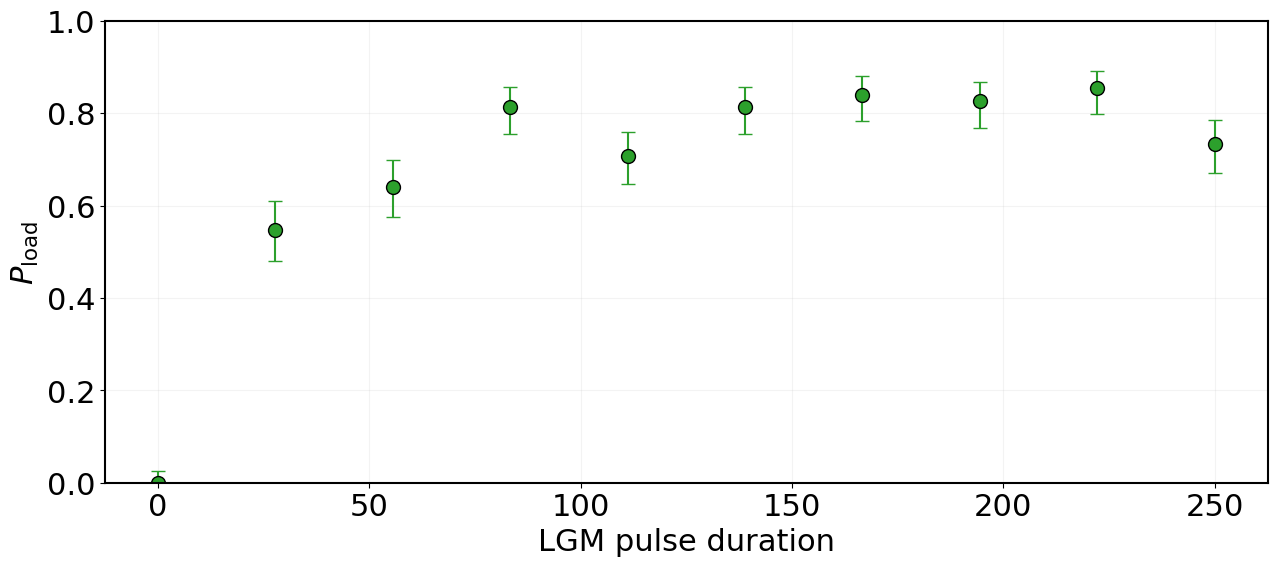

In [60]:
#### pulse duration loading
dataset1 = ta.standardTransferAnalysis(6,tao.getStandardLoadingOptions([2,2,3,3,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]


plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)


plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
# plt.legend(loc=4, ncol = 2,prop={'size': 10})
plt.ylim(0,1)
plt.ylabel(r'$P_{\mathrm{load}}$')
plt.xlabel('LGM pulse duration')
plt.rcParams["axes.linewidth"] = 1.5


In [75]:
from scipy.optimize import curve_fit
def double_gaussian(x, a1, b1, c1, a2, b2, c2):
    return a1 * np.exp(-(x - b1)**2 / (2 * c1**2)) + a2 * np.exp(-(x - b2)**2 / (2 * c2**2))

# Generate data
x_data = zeroed_freqs
y_data = avgTferData1
# Initial guess for parameters
print(zeroed_freqs[0:20])
a1_guess = .6
b1_guess = 80
c1_guess = 10
a2_guess = .8
b2_guess = 850
c2_guess = 5
p0 = [a1_guess, b1_guess, c1_guess, a2_guess, b2_guess, c2_guess]

# Fit curve to data
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=p0)

# Plot data and fit



[944.0, 937.2631578947369, 930.5263157894736, 923.7894736842105, 917.0526315789474, 910.3157894736842, 903.578947368421, 896.8421052631579, 890.1052631578948, 883.3684210526316, 876.6315789473684, 869.8947368421052, 863.1578947368421, 856.421052631579, 849.6842105263158, 842.9473684210526, 836.2105263157895, 829.4736842105264, 822.7368421052631, 816.0, 197.5999999999999]


In [76]:
from scipy.optimize import curve_fit
def single_gaussian(x, a1, b1, c1):
    return a1 * np.exp(-(x - b1)**2 / (2 * c1**2)) 

# Generate data
x_data = zeroed_freqs[21:40]
y_data = avgTferData1[21:40]

x_data2 = zeroed_freqs[0:20]
y_data2 = avgTferData1[0:20]
# Initial guess for parameters

a1_guess = .65
b1_guess = 80
c1_guess = 10
p0 = [a1_guess, b1_guess, c1_guess]

a2_guess = .8
b2_guess = 850
c2_guess = 5
p02 = [a2_guess, b2_guess, c2_guess]

# Fit curve to data
popt, pcov = curve_fit(single_gaussian, x_data, y_data, p0=p0)
popt2, pcov2 = curve_fit(single_gaussian, x_data2, y_data2, p0=p02)
# Plot data and fit



sta: Organizing Transfer Data...
Number of Pictures: 4000; Picture Dimensions: 5 x 24
Variations: 40;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 8:10:18: on (Y-M-D) 2023-3-28, And ended at 8:32:18: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........................................sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 3
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 3
sta: Handling Fitting...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/uncertainties/core.py:188: RuntimeWarning:

invalid value encountered in divide

/Users/stevenpampel/Documents/B232_data_analysis/Data-Analysis-Code-new/Data Analysis Notebook/../Analysis_Python_Files/AnalysisHelpers.py:786: UserWarning:

Data Fit Failed! Eigenvalues did not converge



<Figure size 30000x9600 with 0 Axes>

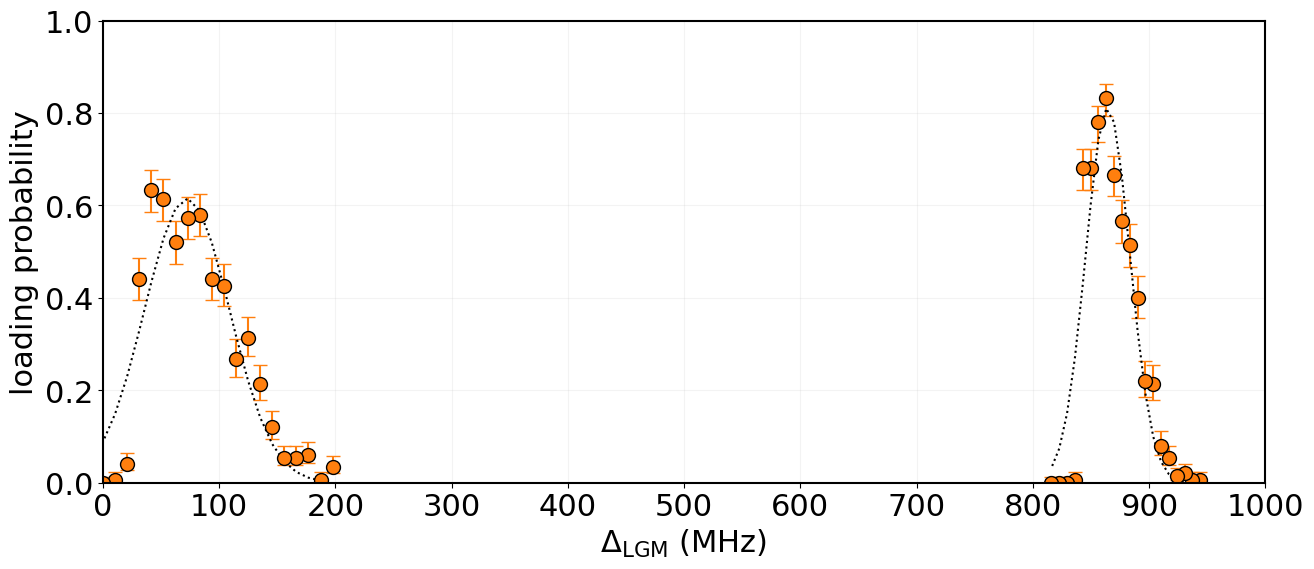

In [80]:
dataset1 = ta.standardTransferAnalysis(9,tao.getStandardLoadingOptions([2,2,3,3,1]),fitModules=[bump2],fitguess=[[0,0.3,-100,10, 0.3, 100, 10]]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]


plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*16
    zeroed_freqs.append(freq)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label='loading probability')
plt.plot(x_data, single_gaussian(x_data, *popt), 'k:')
plt.plot(x_data2, single_gaussian(x_data2, *popt2), 'k:')
# plt.plot(x_data, double_gaussian(x_data, *popt), 'k:')
# ax.plot()


ax.xaxis.set_ticks(ticks)
ax.grid(which='minor', alpha=.1)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, .99), ncol=1,prop={'size':18 },frameon=True)
# plt.legend(loc=4, ncol = 2,prop={'size': 10})
plt.ylim(0,1)
plt.ticklabel_format(style='plain') 
ax.set_xlim(left=-.2)

plt.ylabel('loading probability')
plt.xlabel(r'$ \Delta_{\mathrm{LGM}} \  \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.savefig('load_det_full.png', dpi=1200,bbox_inches="tight")

In [15]:
atomlocs = [2,2,3,3,1]
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])

loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);

loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### loading and collisions on same plot

sta: Organizing Transfer Data...
Number of Pictures: 8000; Picture Dimensions: 5 x 10
Variations: 40;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:51:14: on (Y-M-D) 2023-3-30, And ended at 9:26:7: on 2023-3-30
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
no option???
no option???
no option???
no option???
no option???
no option???
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting...........................................sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 1
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 1
sta: Handling Fitting...
sta: Organizing Transfer Data...
Number of Pictures: 4000; Picture Dimensions: 5 x 24
Variations: 40;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 8:10:18: on (Y-M-D) 2023-3-28, And ended at 8:32:18: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTAT

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/uncertainties/core.py:188: RuntimeWarning:

invalid value encountered in divide

/Users/stevenpampel/Documents/B232_data_analysis/Data-Analysis-Code-new/Data Analysis Notebook/../Analysis_Python_Files/AnalysisHelpers.py:786: UserWarning:

Data Fit Failed! Eigenvalues did not converge

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 30000x9600 with 0 Axes>

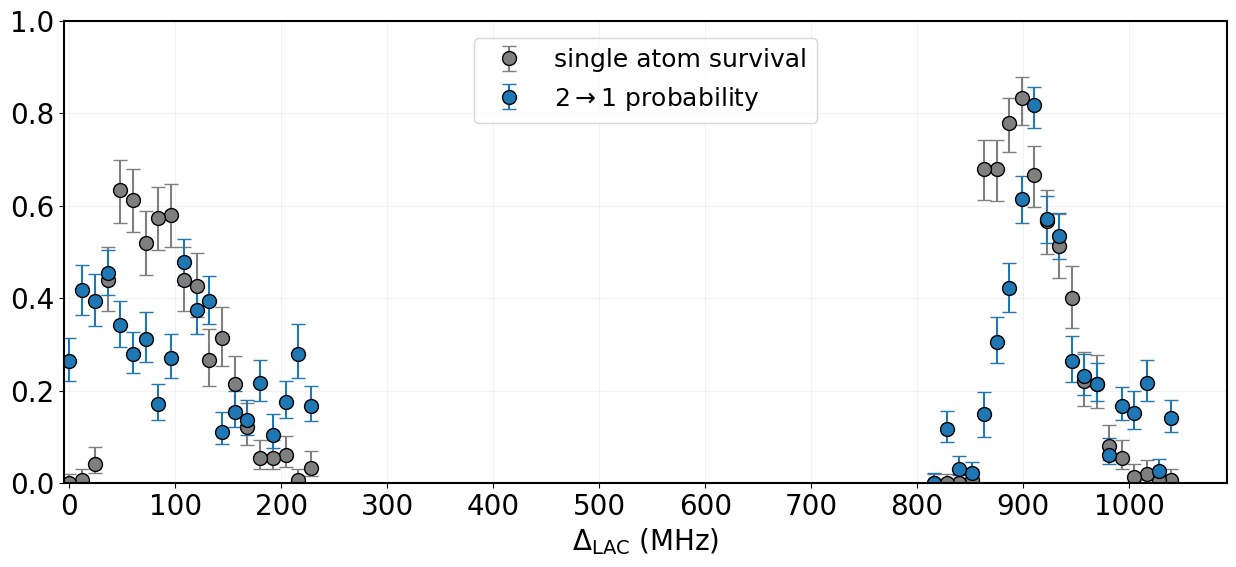

In [19]:
reloadMyModules(30)
fileId = 12
threshold = 55
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

reloadMyModules(28)
dataset2 = ta.standardTransferAnalysis(9,tao.getStandardLoadingOptions([2,2,3,3,1]),fitModules=[bump2],fitguess=[[0,0.3,-100,10, 0.3, 100, 10]]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2

color2 = 'tab:grey'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*16
    zeroed_freqs.append(freq)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(zeroed_freqs),100)

avgTferData1[15]=.15
print(len(avgTferData1))
ax.errorbar(zeroed_freqs,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='single atom survival')
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ 2 \rightarrow  1 \ \mathrm{ probability} $')

ax.xaxis.set_ticks(ticks)
ax.grid(which='minor', alpha=.1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, .99), ncol=1,prop={'size':18 },frameon=True)
# plt.legend(bbox_to_anchor=(.3, .900), ncol = 2,)
# plt.legend(loc=4, ncol = 1,prop={'size': 30})
plt.ylim(0,1)
# plt.ylabel('survival')
plt.xlabel(r'$ \Delta_{\mathrm{LAC}} \  \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain')  
# ax.set_xticklabels([])

ax.set_xlim(left=-5)
plt.savefig('col_det_full.png', dpi=1200,bbox_inches="tight")

Opening Basler Images.


/Users/stevenpampel/Documents/Python/Data-Analysis-Code-new/Data Analysis Notebook/../Analysis_Python_Files/AnalysisHelpers.py:869: UserWarning:

Horizontal Average Picture Fitting Failed!




Temperture in the Large Laser Beam Approximation (2D Fits): 16.4(95) uK

Temperture in the Large Laser Beam Approximation (1D Fits): 900(2100) uK
2D Fit-Parameters: [1.21455869e-09 1.04212130e-03 1.64163755e-05]


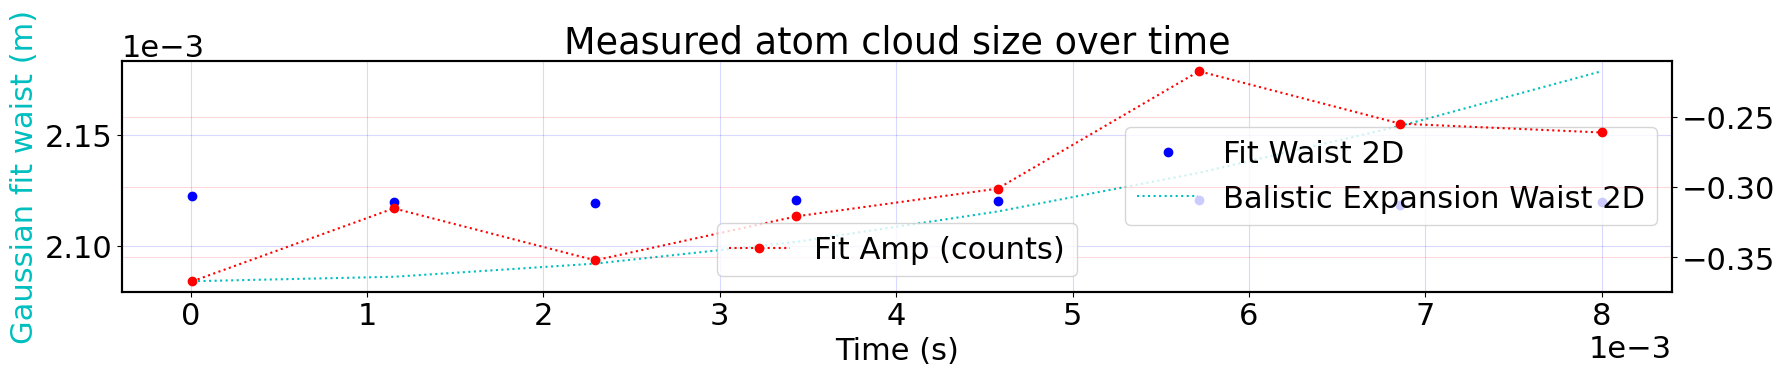

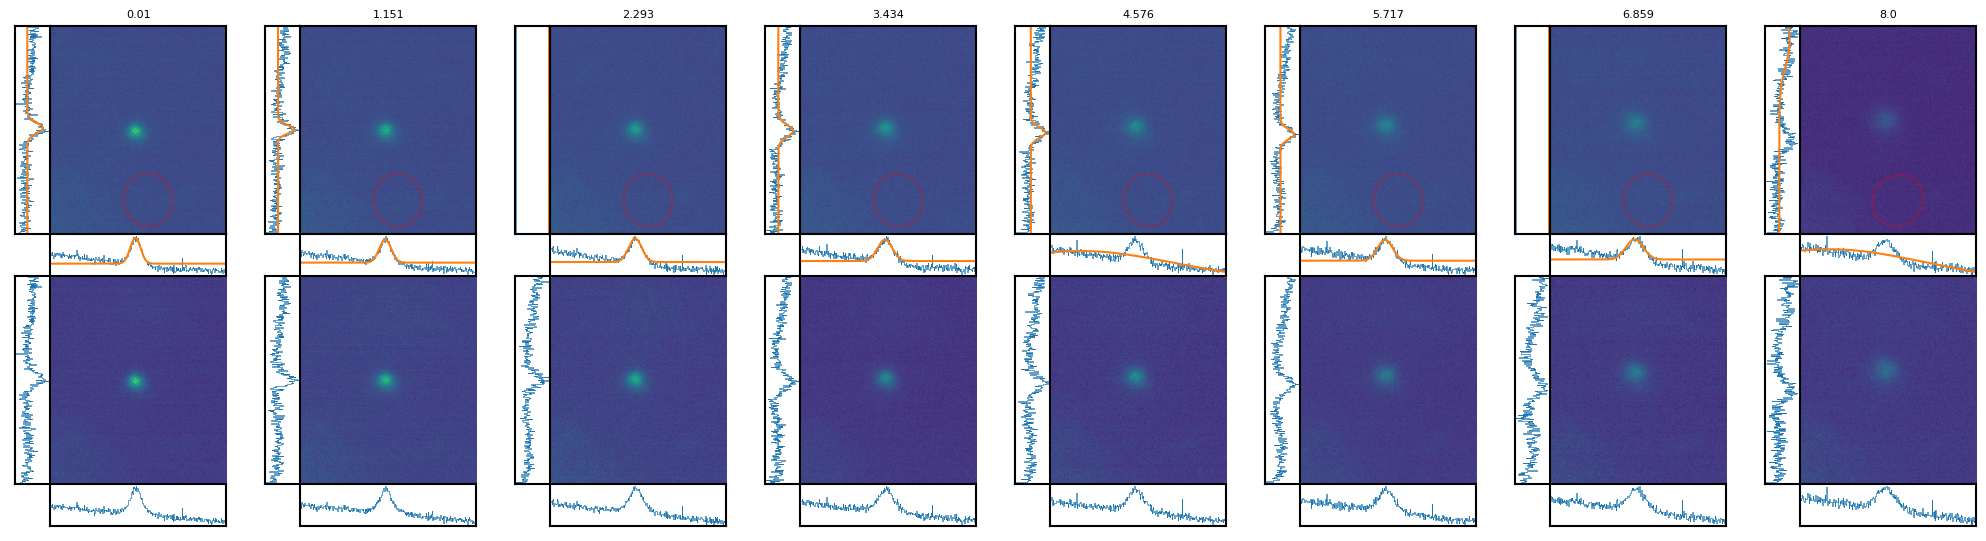

In [38]:
win = pw.PictureWindow(xmin=10)
reload(ah)
reload(ma)
reload(mp)
res = mp.plotMotTemperature(44, reps=15, fitWidthGuess=30, lastDataIsBackground=False, temperatureGuess=10e-6,window=win);

In [45]:
atomlocs = [2,2,3,3,1]

### File 60 (7x1_Atom_Loading_And_Imaging_LGM):  

Number of Pictures: 800; Picture Dimensions: 5 x 24
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:7:39: on (Y-M-D) 2023-3-28, And ended at 12:12:34: on 2023-3-28
Experiment Notes:  



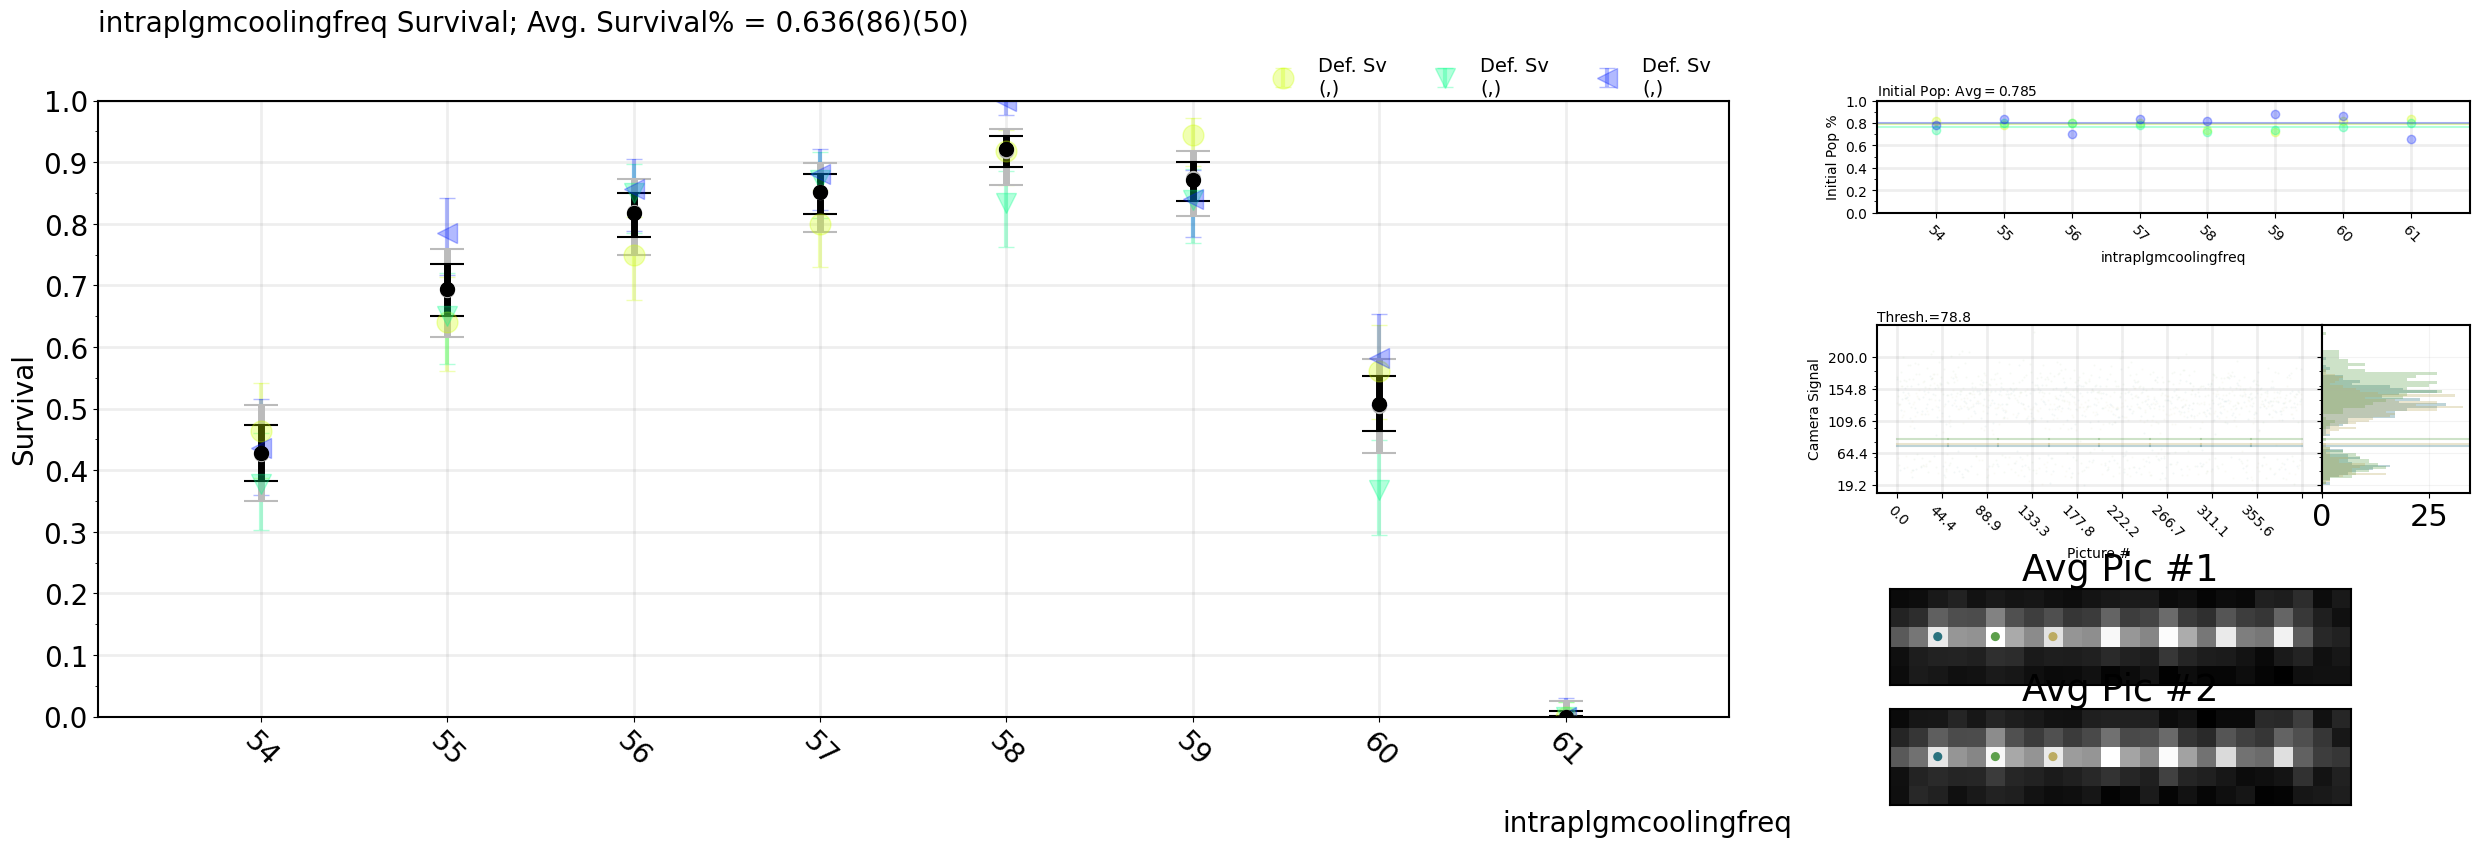

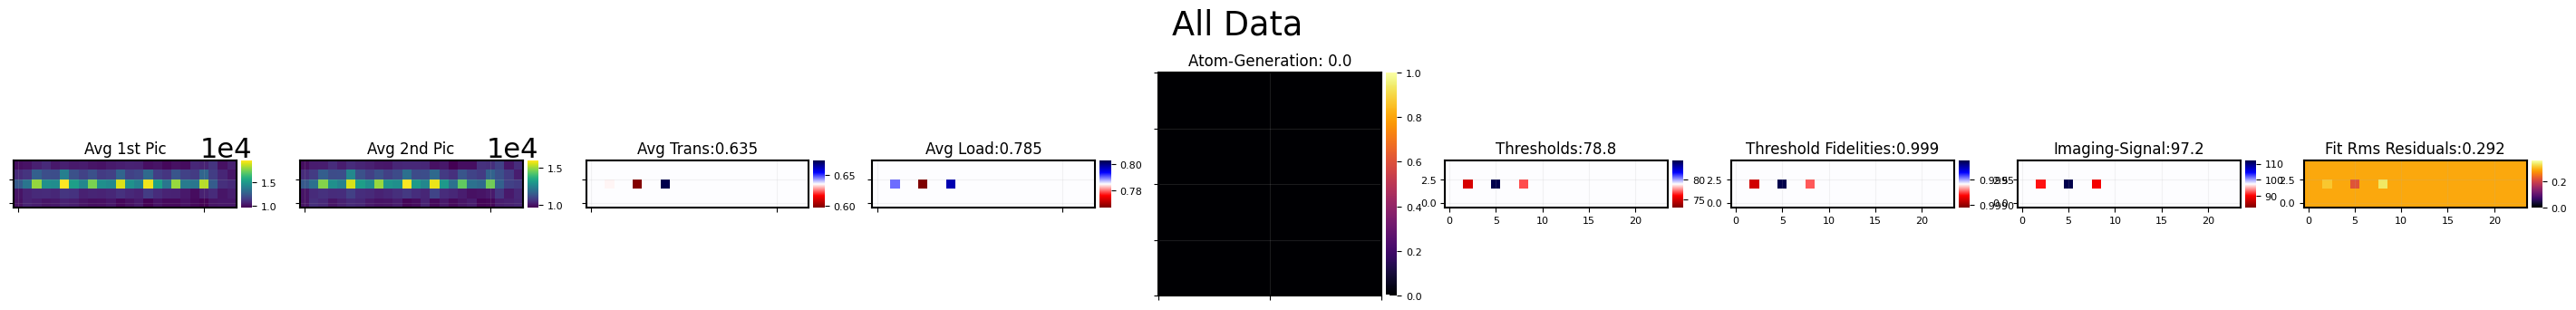

In [48]:
mp.Survival(60,atomlocs);

### File 62 (7x1_Atom_Loading_And_Imaging_LGM): pgc intrap

Number of Pictures: 800; Picture Dimensions: 5 x 24
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:50:37: on (Y-M-D) 2023-3-28, And ended at 12:55:32: on 2023-3-28
Experiment Notes: not great



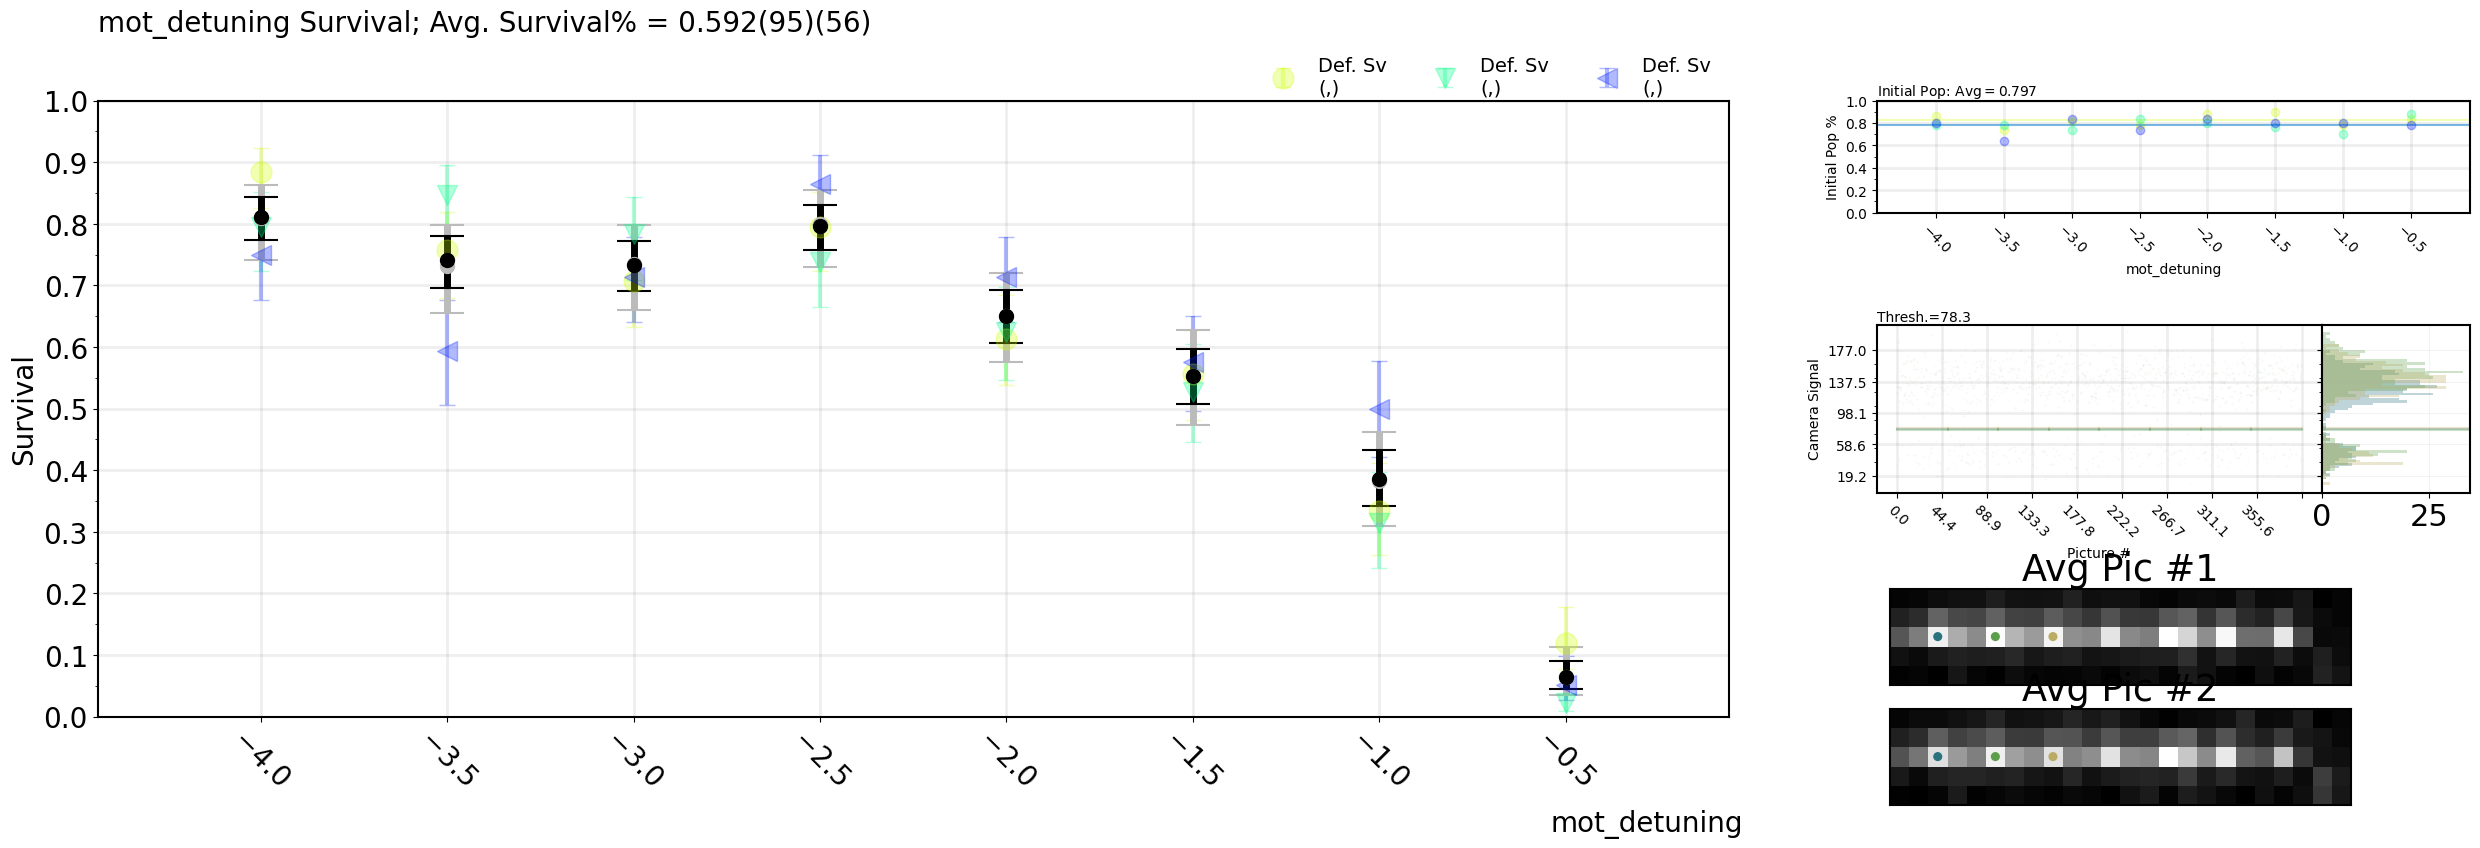

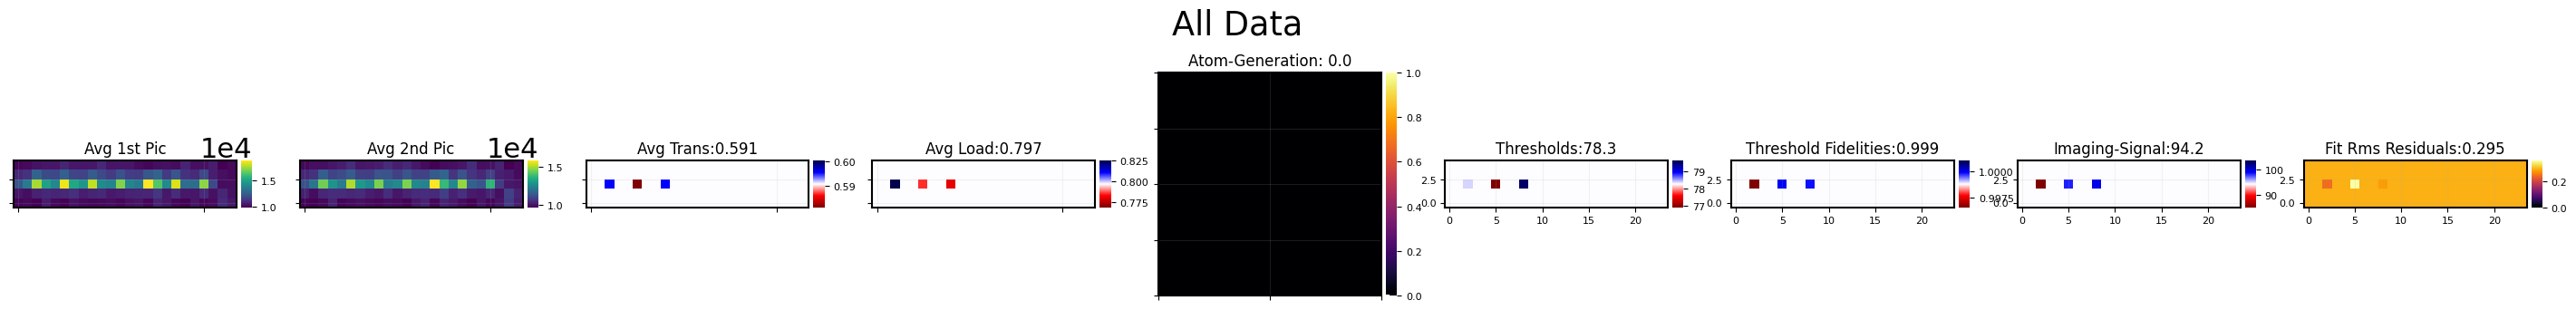

In [50]:
mp.Survival(62,atomlocs);

In [80]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])

loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);

loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

sta: Organizing Transfer Data...
Number of Pictures: 9000; Picture Dimensions: 5 x 10
Variations: 30;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 16:7:9: on (Y-M-D) 2023-3-28, And ended at 16:47:26: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
no option???
no option???
no option???
no option???
no option???
no option???
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting.................................sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 2
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 2
sta: Handling Fitting...
keys: gmcollision_freq


/Users/stevenpampel/Documents/Python/Data-Analysis-Code-new/Data Analysis Notebook/../Analysis_Python_Files/MatplotlibPlotters.py:748: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



(2, 30)
[0.30666666666666664, 0.34, 0.3466666666666667, 0.4066666666666667, 0.32, 0.4, 0.42, 0.4066666666666667, 0.3333333333333333, 0.37333333333333335, 0.4066666666666667, 0.46, 0.46, 0.4, 0.42, 0.36666666666666664, 0.4533333333333333, 0.38666666666666666, 0.34, 0.42, 0.3466666666666667, 0.26666666666666666, 0.38, 0.4066666666666667, 0.36, 0.41333333333333333, 0.3466666666666667, 0.4066666666666667, 0.4066666666666667, 0.42]
(2, 30)
[0.4866666666666667, 0.35333333333333333, 0.35333333333333333, 0.35333333333333333, 0.43333333333333335, 0.32, 0.31333333333333335, 0.35333333333333333, 0.38666666666666666, 0.36666666666666664, 0.2866666666666667, 0.31333333333333335, 0.24666666666666667, 0.32, 0.32, 0.37333333333333335, 0.36, 0.38666666666666666, 0.3466666666666667, 0.4, 0.42, 0.41333333333333333, 0.4066666666666667, 0.3, 0.38666666666666666, 0.36666666666666664, 0.36666666666666664, 0.34, 0.28, 0.32]
Making Avg Plots...


/Users/stevenpampel/Documents/Python/Data-Analysis-Code-new/Data Analysis Notebook/../Analysis_Python_Files/MatplotlibPlotters.py:157: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



IndexError: list index out of range

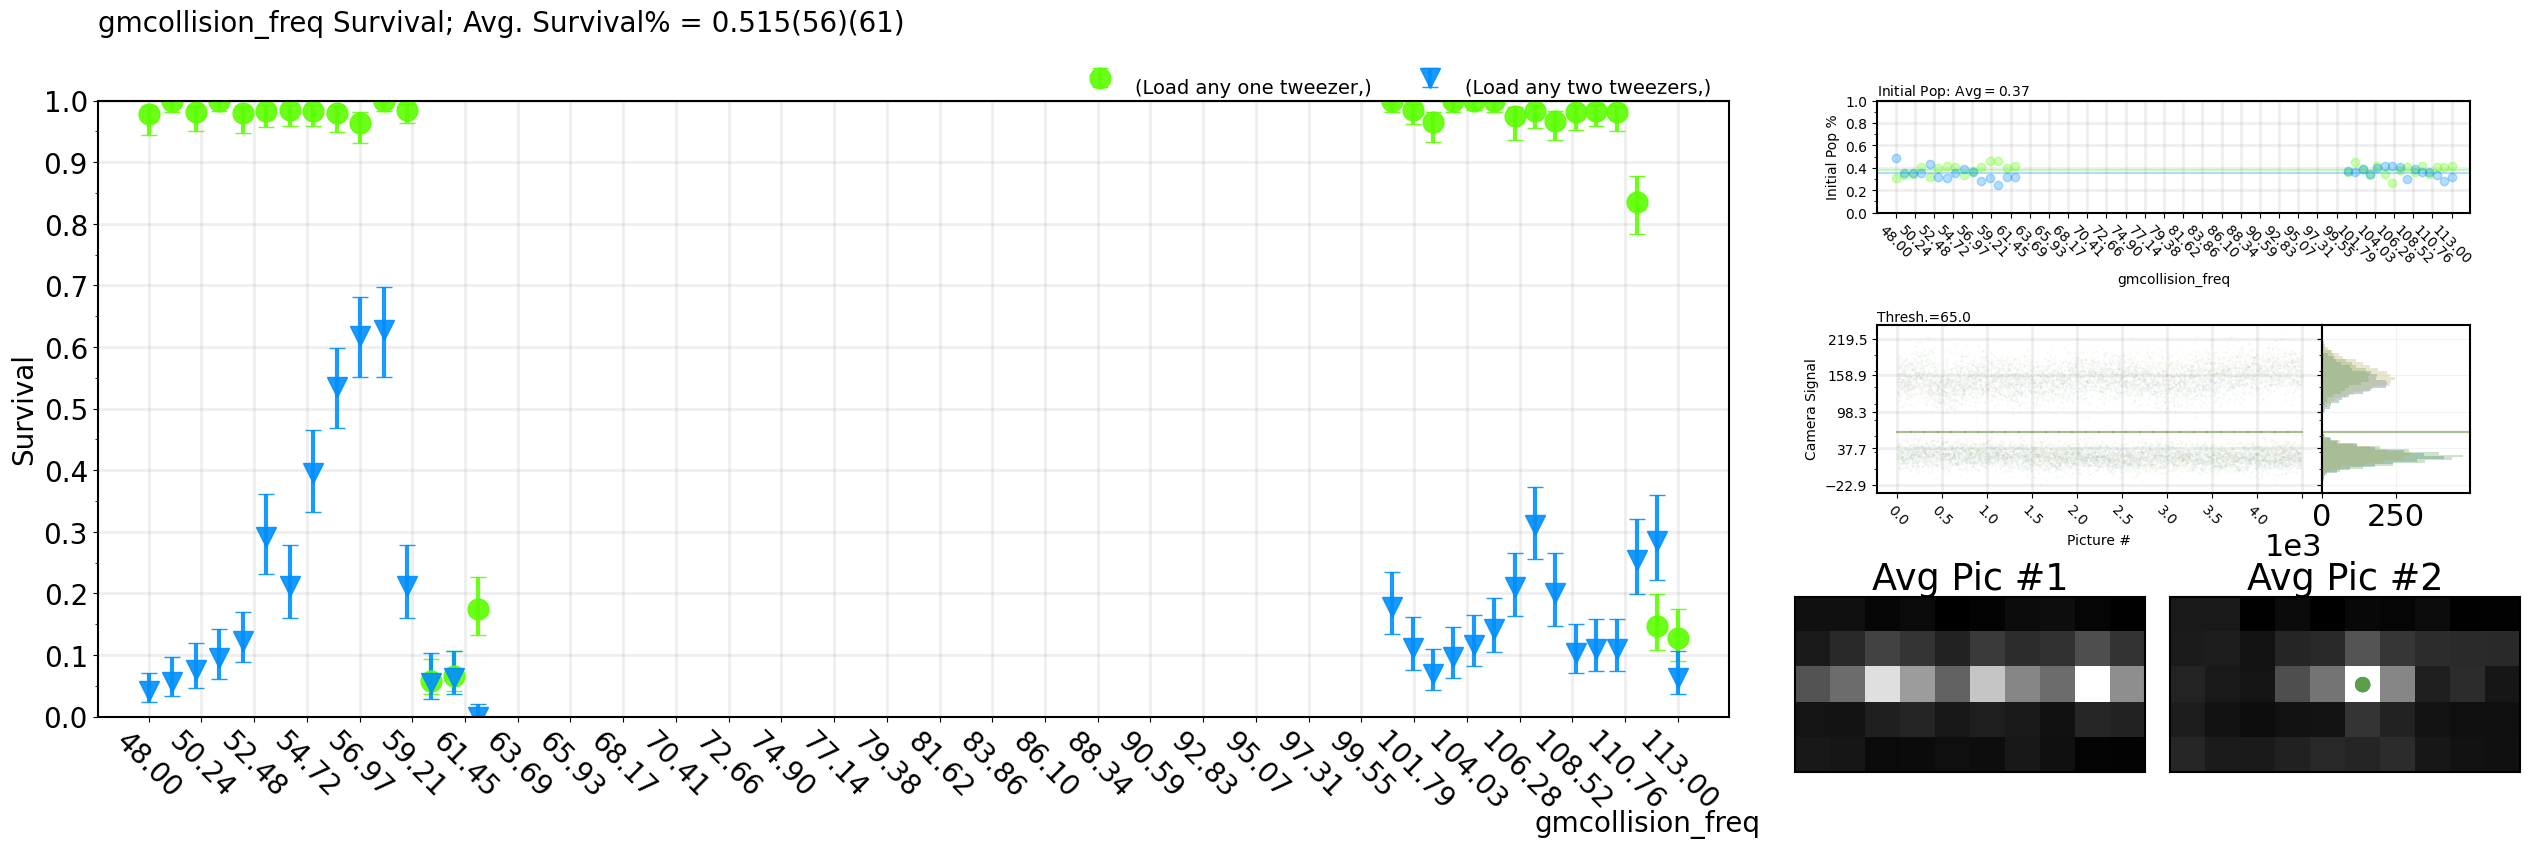

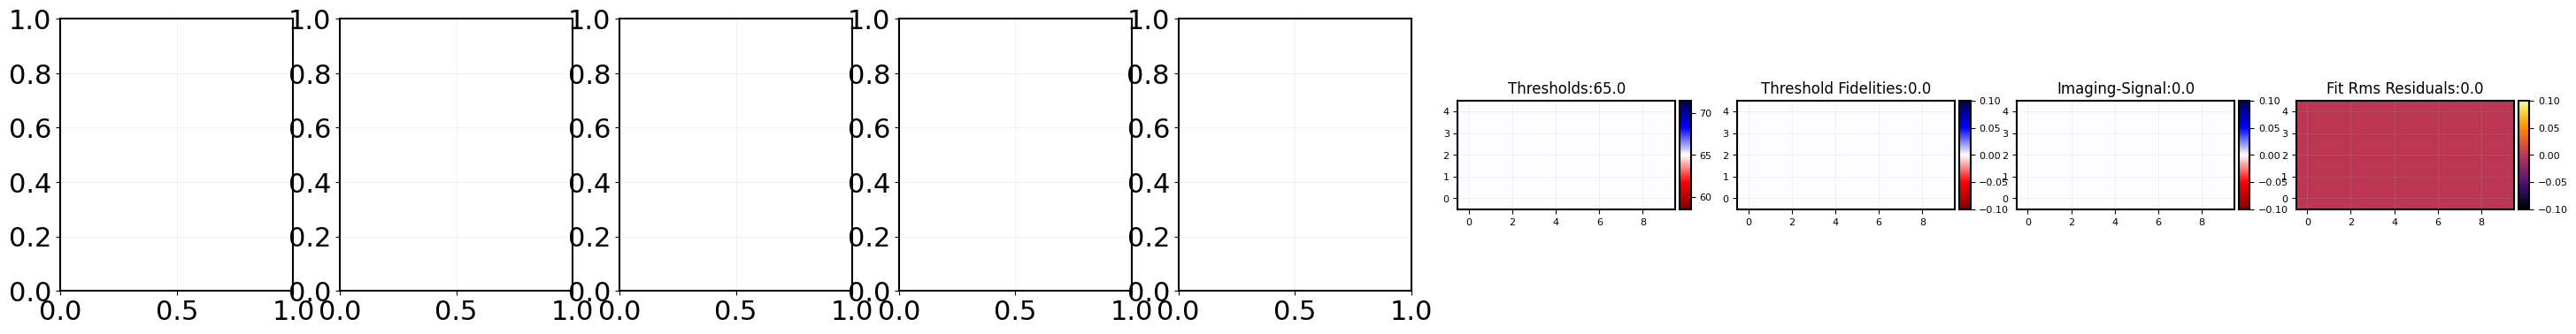

In [89]:
mp.Transfer(83, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 65)]);

sta: Organizing Transfer Data...
Number of Pictures: 10500; Picture Dimensions: 5 x 10
Variations: 35;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 22:55:59: on (Y-M-D) 2023-3-28, And ended at 23:40:39: on 2023-3-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...
no option???
no option???
no option???
no option???
no option???
no option???
sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting......................................sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 1
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 1
sta: Handling Fitting...
sta: Organizing Transfer Data...
Number of Pictures: 10500; Picture Dimensions: 5 x 10
Variations: 35;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 22:55:59: on (Y-M-D) 2023-3-28, And ended at 23:40:39: on 2023-3-28
Experiment Notes: HDF5 NOT ANNO

<Figure size 30000x9600 with 0 Axes>

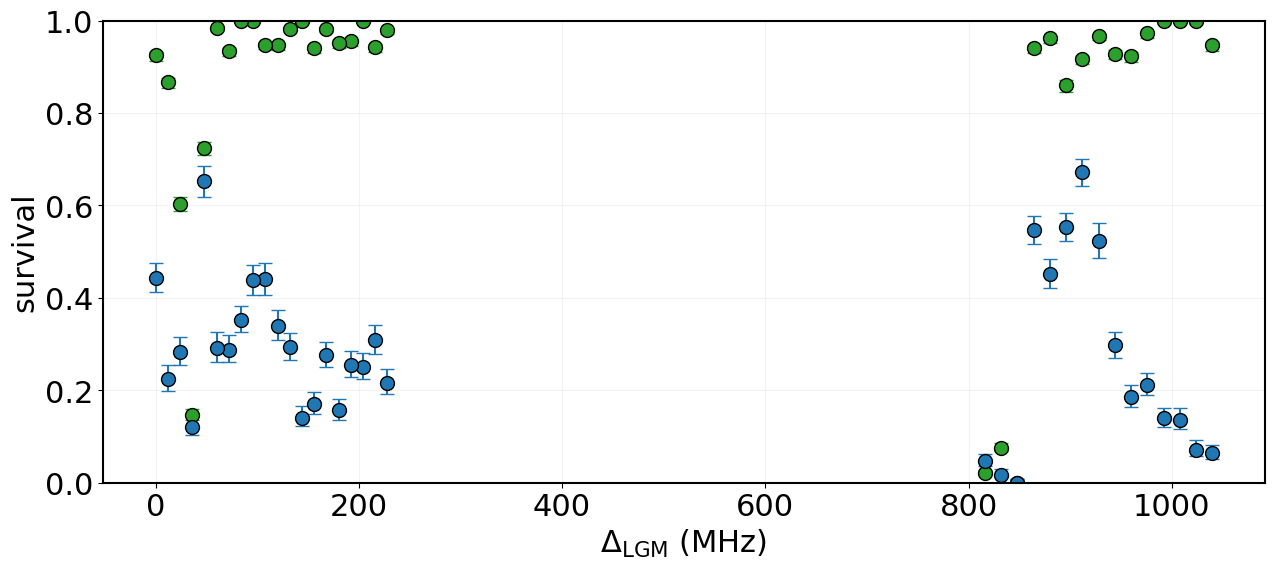

In [132]:
fileId = 88
threshold = 75

dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/2
    lo = avgTferErr1[i][1]/2
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]/4
    lo = avgTferErr2[i][1]/4
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*16
    zeroed_freqs.append(freq)
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(zeroed_freqs,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='load 1 atom')
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='load 2 atoms')


# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
# plt.legend(loc=4, ncol = 2,prop={'size': 10})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'$ \Delta_{\mathrm{LGM}} \  \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 